# CitiBike Dataset Exploration
## By Hunter Bravence

## Introduction 
**This data set is about public bike sharing information**
**The data spands over one year for 2019 and it's from New York City**
**This is open for the too the public and the release new data ever month**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes

import seaborn as sb
import numpy as np
import geopandas
from shapely.geometry import Point



In [3]:
#open all the csv into dataframes
df_1 = pd.read_csv('JC-201901-citibike-tripdata.csv')
df_2 = pd.read_csv('JC-201902-citibike-tripdata.csv')
df_3 = pd.read_csv('JC-201903-citibike-tripdata.csv')
df_4 = pd.read_csv('JC-201904-citibike-tripdata.csv')
df_5 = pd.read_csv('JC-201905-citibike-tripdata.csv')
df_6 = pd.read_csv('JC-201906-citibike-tripdata.csv')
df_7 = pd.read_csv('JC-201907-citibike-tripdata.csv')
df_8 = pd.read_csv('JC-201908-citibike-tripdata.csv')
df_9 = pd.read_csv('JC-201909-citibike-tripdata.csv')
df_10 = pd.read_csv('JC-201910-citibike-tripdata.csv')
df_11 = pd.read_csv('JC-201911-citibike-tripdata.csv')
df_12 = pd.read_csv('JC-201912-citibike-tripdata.csv')


In [4]:
#load a map of new yorks boroughs
New_York = geopandas.read_file("Borough Boundaries.geojson")

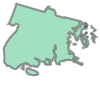

In [5]:
#check to see if the map loaded 
New_York['geometry'][0]

In [6]:
#get a feel for the new york map data
New_York['geometry']

0    MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
1    MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...
2    MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...
3    MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...
4    MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...
Name: geometry, dtype: geometry

In [7]:
#get a feel the new york data frame 
New_York.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2,Bronx,1186612478.34,462958.187537,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,5,Staten Island,1623757282.78,325956.009,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1,Manhattan,636602658.568,361212.476363,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3,Brooklyn,1937593020.61,738745.842046,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
4,4,Queens,3045878171.58,904191.43261,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."


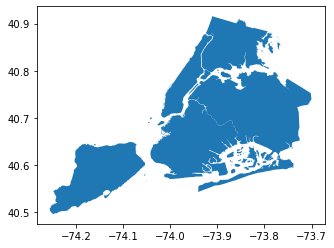

In [8]:
#plot newyork
New_York.plot()

In [9]:
# finding the crs
print(New_York.crs)

{'init': 'epsg:4326'}


In [10]:
#check the data to see what needs to be down
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [11]:
#check the data types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19676 entries, 0 to 19675
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             19676 non-null  int64  
 1   starttime                19676 non-null  object 
 2   stoptime                 19676 non-null  object 
 3   start station id         19676 non-null  int64  
 4   start station name       19676 non-null  object 
 5   start station latitude   19676 non-null  float64
 6   start station longitude  19676 non-null  float64
 7   end station id           19676 non-null  int64  
 8   end station name         19676 non-null  object 
 9   end station latitude     19676 non-null  float64
 10  end station longitude    19676 non-null  float64
 11  bikeid                   19676 non-null  int64  
 12  usertype                 19676 non-null  object 
 13  birth year               19676 non-null  int64  
 14  gender                

### What is the structure of your dataset?
> The structure of the dataset is made out of severaly smaller datasets that you have to peice together

### What are the main features of interest in the data set
> the main features of the data set are trip duration, lat and long, gender, birth year, usertype. start and stop station id/name, bike id, and start and stop time.

### What features in the dataset do you will help support your investigation into your features of intereset?
> Start time, lat and long, trip duration, user type, birth year, and gender. Can all provide pretty solid insight into the demographics

## Data Quality
**rename columns so they are more readable**

**drop columns that I am not planning on using**


**change usertype to category varible along with gender**

**change starttime & endtime to datetime**

**take birth year and turn it into age the bin the data**


In [12]:
# combine all the different months into one year
year = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]

In [13]:
#make it all one data frame
NY_2019 = pd.concat(year)

In [14]:
NY_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404947 entries, 0 to 19727
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             404947 non-null  int64  
 1   starttime                404947 non-null  object 
 2   stoptime                 404947 non-null  object 
 3   start station id         404947 non-null  int64  
 4   start station name       404947 non-null  object 
 5   start station latitude   404947 non-null  float64
 6   start station longitude  404947 non-null  float64
 7   end station id           404947 non-null  int64  
 8   end station name         404947 non-null  object 
 9   end station latitude     404947 non-null  float64
 10  end station longitude    404947 non-null  float64
 11  bikeid                   404947 non-null  int64  
 12  usertype                 404947 non-null  object 
 13  birth year               404947 non-null  int64  
 14  gende

In [15]:
#rename columns so they are more readable 
NY_2019 =NY_2019.rename(columns={'end station id' :'end_station_id', 'end station name' :'end_station_name', 'bikeid':'bike_id','usertype':'user_type'})

In [16]:
#rename columns so they are more readable.
NY_2019=NY_2019.rename(columns = {'start station id':'start_station_id','start station name':'start_station_name','starttime':'start_time','stoptime':'stop_time','tripduration':'trip_duration','birth year':'birth_year'})

In [17]:
#take lat and long and turn it into coordinates
NY_2019['starting_coordinates'] = NY_2019[['start station longitude','start station latitude']].values.tolist()
NY_2019['ending_coordinates'] = NY_2019[['end station longitude','end station latitude']].values.tolist()

In [18]:
#rename lat and long columns
ny_19=NY_2019.rename(columns ={'start station latitude': 'start_latitude', 'start station longitude' :'start_longitude', 'end station latitude' : 'end_latitude', 'end station longitude':'end_longitude'} )

In [19]:
ny_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404947 entries, 0 to 19727
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trip_duration         404947 non-null  int64  
 1   start_time            404947 non-null  object 
 2   stop_time             404947 non-null  object 
 3   start_station_id      404947 non-null  int64  
 4   start_station_name    404947 non-null  object 
 5   start_latitude        404947 non-null  float64
 6   start_longitude       404947 non-null  float64
 7   end_station_id        404947 non-null  int64  
 8   end_station_name      404947 non-null  object 
 9   end_latitude          404947 non-null  float64
 10  end_longitude         404947 non-null  float64
 11  bike_id               404947 non-null  int64  
 12  user_type             404947 non-null  object 
 13  birth_year            404947 non-null  int64  
 14  gender                404947 non-null  int64  
 15  s

In [20]:
#check the data statics for bin purposes 
ny_19.describe()

,trip_duration,start_station_id,start_latitude,start_longitude,end_station_id,end_latitude,end_longitude,bike_id,birth_year,gender
count,4.049470e+05,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000
mean,7.258427e+02,3294.022391,40.722722,-74.046333,3292.219142,40.722328,-74.045792,28465.511998,1981.417524,1.162335
std,9.785237e+03,171.021930,0.007037,0.010871,180.886426,0.006885,0.010829,1654.373618,10.257440,0.516120
min,6.100000e+01,3183.000000,40.709651,-74.083639,116.000000,40.695065,-74.083639,14792.000000,1887.000000,0.000000
25%,2.330000e+02,3195.000000,40.718355,-74.050444,3192.000000,40.718355,-74.050389,26286.000000,1975.000000,1.000000
50%,3.450000e+02,3210.000000,40.721525,-74.043845,3207.000000,40.721124,-74.043117,29284.000000,1984.000000,1.000000
75%,5.800000e+02,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.038051,29536.000000,1989.000000,1.000000
max,2.566420e+06,3792.000000,40.748716,-74.032108,3792.000000,40.814326,-73.932077,41913.000000,2003.000000,2.000000


In [21]:
# take start and stop time and turnit into timedate
ny_19['start_time'] = pd.to_datetime(ny_19['start_time'])
ny_19['stop_time'] = pd.to_datetime(ny_19['stop_time'])

In [22]:
ny_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404947 entries, 0 to 19727
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trip_duration         404947 non-null  int64         
 1   start_time            404947 non-null  datetime64[ns]
 2   stop_time             404947 non-null  datetime64[ns]
 3   start_station_id      404947 non-null  int64         
 4   start_station_name    404947 non-null  object        
 5   start_latitude        404947 non-null  float64       
 6   start_longitude       404947 non-null  float64       
 7   end_station_id        404947 non-null  int64         
 8   end_station_name      404947 non-null  object        
 9   end_latitude          404947 non-null  float64       
 10  end_longitude         404947 non-null  float64       
 11  bike_id               404947 non-null  int64         
 12  user_type             404947 non-null  object        
 13  

In [23]:
# apply points so you graph the coordinates
ny_19['starting_coordinates'] = ny_19['starting_coordinates'].apply(Point)
ny_19['ending_coordinates'] = ny_19['ending_coordinates'].apply(Point)

In [24]:
ny_19.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_latitude,start_longitude,end_station_id,end_station_name,end_latitude,end_longitude,bike_id,user_type,birth_year,gender,starting_coordinates,ending_coordinates
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,POINT (-74.03345880000001 40.7162469),POINT (-74.03648570000001 40.71277420000001)
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,POINT (-74.03345880000001 40.7162469),POINT (-74.03548259999999 40.7242941)
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,POINT (-74.03345880000001 40.7162469),POINT (-74.0557013 40.71124229999999)
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,POINT (-74.03345880000001 40.7162469),POINT (-74.03548259999999 40.7242941)
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,POINT (-74.03345880000001 40.7162469),POINT (-74.03548259999999 40.7242941)


In [25]:
ny_19= geopandas.GeoDataFrame(ny_19, geometry = 'starting_coordinates')
ny_19 = geopandas.GeoDataFrame(ny_19, geometry = 'ending_coordinates')

In [26]:
ny_19.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 404947 entries, 0 to 19727
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trip_duration         404947 non-null  int64         
 1   start_time            404947 non-null  datetime64[ns]
 2   stop_time             404947 non-null  datetime64[ns]
 3   start_station_id      404947 non-null  int64         
 4   start_station_name    404947 non-null  object        
 5   start_latitude        404947 non-null  float64       
 6   start_longitude       404947 non-null  float64       
 7   end_station_id        404947 non-null  int64         
 8   end_station_name      404947 non-null  object        
 9   end_latitude          404947 non-null  float64       
 10  end_longitude         404947 non-null  float64       
 11  bike_id               404947 non-null  int64         
 12  user_type             404947 non-null  object      

In [27]:
#create a formula so you calcute the distance between starting and ending coordinates
def haversine_vectorize(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    newlon = lon2 -lon1
    newlat = lat2 - lat1 
    
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat2) * np.sin(newlon/2.0)**2
    
    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = 6367 * dist
    return km

In [28]:
#create a distance column from calcuted starting stopping coordinates
ny_19['distance'] = haversine_vectorize(ny_19['start_longitude'],ny_19['start_latitude'],ny_19['end_longitude'],ny_19['end_latitude'])

In [29]:
# created different graphable variables for time like day and month
ny_19['start_hour'] = ny_19['start_time'].dt.hour
ny_19['day'] = ny_19['start_time'].dt.day
ny_19['month'] = ny_19['start_time'].dt.month

In [30]:
ny_19.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 404947 entries, 0 to 19727
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   trip_duration         404947 non-null  int64         
 1   start_time            404947 non-null  datetime64[ns]
 2   stop_time             404947 non-null  datetime64[ns]
 3   start_station_id      404947 non-null  int64         
 4   start_station_name    404947 non-null  object        
 5   start_latitude        404947 non-null  float64       
 6   start_longitude       404947 non-null  float64       
 7   end_station_id        404947 non-null  int64         
 8   end_station_name      404947 non-null  object        
 9   end_latitude          404947 non-null  float64       
 10  end_longitude         404947 non-null  float64       
 11  bike_id               404947 non-null  int64         
 12  user_type             404947 non-null  object      

In [31]:
ny_19['end_station_name'].value_counts()

Grove St PATH            58697
Hamilton Park            22054
Sip Ave                  18226
Harborside               17916
Newport PATH             17840
                         ...  
Hudson St & Reade St         1
Pershing Square North        1
W 15 St & 6 Ave              1
E 53 St & Madison Ave        1
W 17 St & 8 Ave              1
Name: end_station_name, Length: 120, dtype: int64

In [32]:
ny_19['end_station_id'].value_counts()

3186    58697
3203    22054
3195    18226
3639    17916
3202    17840
        ...  
376         1
116         1
363         1
3435        1
513         1
Name: end_station_id, Length: 120, dtype: int64

Station id and station name have the same count so their doesn't appear to be any inconstinces

In [33]:
ny_19['bike_id'].value_counts()

29286    1134
26159    1071
29612    1060
29210    1059
29660    1055
         ... 
38675       1
15035       1
26752       1
29757       1
31263       1
Name: bike_id, Length: 609, dtype: int64

In [34]:
#drop the columns that I wont be using during the anylsis 
ny_19= ny_19.drop( columns = ['bike_id', 'end_station_id', 'start_station_id', 'start_station_name', 'end_station_name'], axis =1)

In [35]:
# check the statistics after all the new variables have been created 
ny_19.describe()

,trip_duration,start_latitude,start_longitude,end_latitude,end_longitude,birth_year,gender,distance,start_hour,day,month
count,4.049470e+05,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000,404947.000000
mean,7.258427e+02,40.722722,-74.046333,40.722328,-74.045792,1981.417524,1.162335,1.056534,13.606556,15.669201,6.949655
std,9.785237e+03,0.007037,0.010871,0.006885,0.010829,10.257440,0.516120,0.708801,5.085622,8.759794,2.999179
min,6.100000e+01,40.709651,-74.083639,40.695065,-74.083639,1887.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.330000e+02,40.718355,-74.050444,40.718355,-74.050389,1975.000000,1.000000,0.636154,9.000000,8.000000,5.000000
50%,3.450000e+02,40.721525,-74.043845,40.721124,-74.043117,1984.000000,1.000000,0.890028,14.000000,16.000000,7.000000
75%,5.800000e+02,40.727224,-74.038051,40.727224,-74.038051,1989.000000,1.000000,1.354937,18.000000,23.000000,9.000000
max,2.566420e+06,40.748716,-74.032108,40.814326,-73.932077,2003.000000,2.000000,15.047315,23.000000,31.000000,12.000000


## Univariate Exploration

> You can tell that majority of the the bike trips aren't that long, and skews heaviley to the right

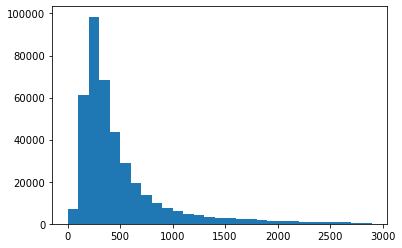

In [36]:
#plot how long the trip typically takes
bins = np.arange(0, 3000, 100)
plt.hist(data = ny_19, x = 'trip_duration', bins = bins);

> the majority of rides seem to be happening for 3 to 6 minutes

Text(0, 0.5, 'number of rides')

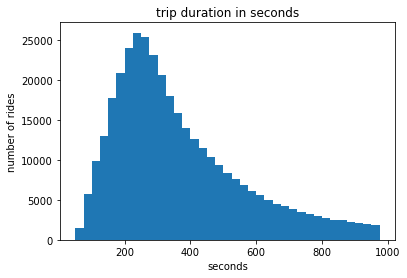

In [37]:
#plot the trip duration to get a better view of it 
bins = np.arange(50, 1000, 25)
plt.hist(data = ny_19, x = 'trip_duration', bins = bins)
plt.title('trip duration in seconds')
plt.xlabel('seconds')
plt.ylabel('number of rides')

> from starting to stopping point in a straight line they are traveling between 10 to 20 meters

>so the distance that people are traveling doesn't seem that far but it doesn't take into consideration the route that have gone

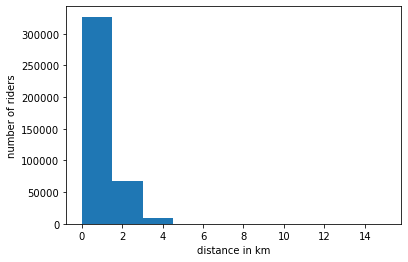

In [38]:
bins = np.arange(0, .05, .005)
plt.hist(data = ny_19, x = 'distance' )
plt.xlabel('distance in km')
plt.ylabel('number of riders');


> It seems that mojority of riders are male, which is labeled as one. Two which would be females has less than half the riders than males do. Why are their so few riders.

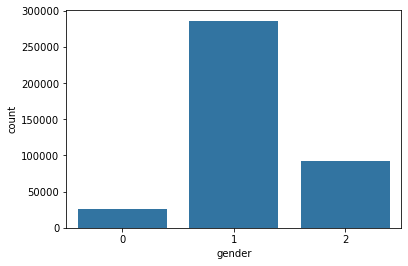

In [39]:
# plot the different gender 
base_color =sb.color_palette()[0]
sb.countplot(data= ny_19, x = 'gender', color = base_color)

> Their are way more riders that are subscribers than one time user users


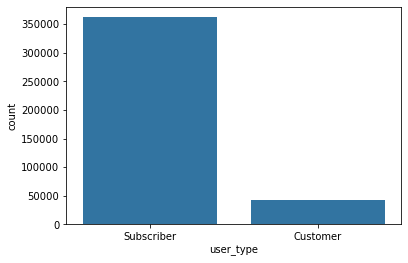

In [40]:
#plot the usertype 
sb.countplot(data = ny_19, x = 'user_type', color = base_color)

Graph time data from month, Wondering if can do weekend, hour of the day. Day of the week perhaps 0 = monday, 6 = sunday, since 75% are under 10 minutes then it would probably be safe to do hour starting hour

>peaks seams to be before and after work, which makes sense. Along with the fact that their are virtually no riders at night

> It would be interesting to see the hour of the days compared to user type

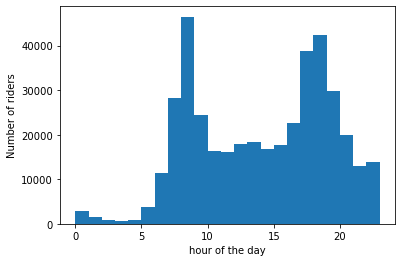

In [41]:
#plot the hours of the day
bins = np.arange(0, 24, 1)
plt.hist(data = ny_19, x = 'start_hour', bins = bins)
plt.xlabel('hour of the day')
plt.ylabel('Number of riders');

I thought this would be more insightful and be the days of the week instead of days of the month. I wanted to see the trends between weekday and week end

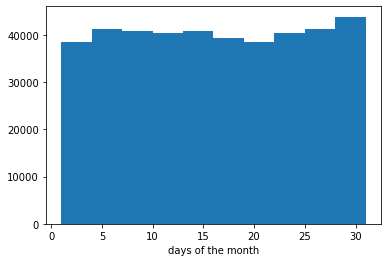

In [42]:
#bins = np.arange(0,31,1)
plt.hist(data = ny_19, x = 'day' )
plt.xlabel('days of the month');

Theirs a weird jump at the end of the month

>This is any interesting dip because it doesn't seem to corelates with the season for the number of people who riding during each month seems like it has more to do with how short the month is. 

>Then you take a look at the second graph where I put bins for each ride during a certian month

> It would be interesting to the usertype compared with the month of the year


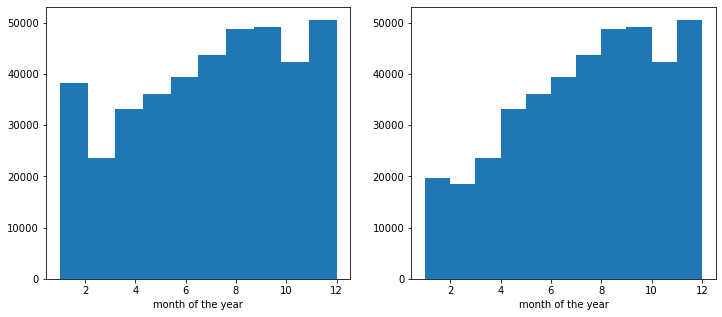

In [43]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.hist(data = ny_19, x= 'month')
plt.xlabel('month of the year')
#plot second graph
plt.subplot(1,2,2)
bins = np.arange(1, 13, 1)
plt.hist(data=ny_19, x = 'month', bins = bins)
plt.xlabel('month of the year');

> most of the riders seem to be in their 30s or 40s

(array([   142.,    657.,   3882.,   9506.,  15614.,  39708.,  26345.,
         43471.,  73671., 101892.,  72626.,  16890.]),
 array([1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990,
        1995, 2000]),
 <a list of 12 Patch objects>)

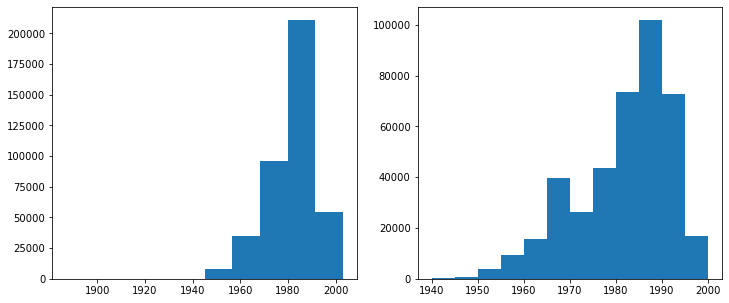

In [44]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(data = ny_19, x= 'birth_year')

plt.subplot(1,2,2)
bins= np.arange(1940, 2005, 5)
plt.hist(data = ny_19, x= 'birth_year', bins = bins)

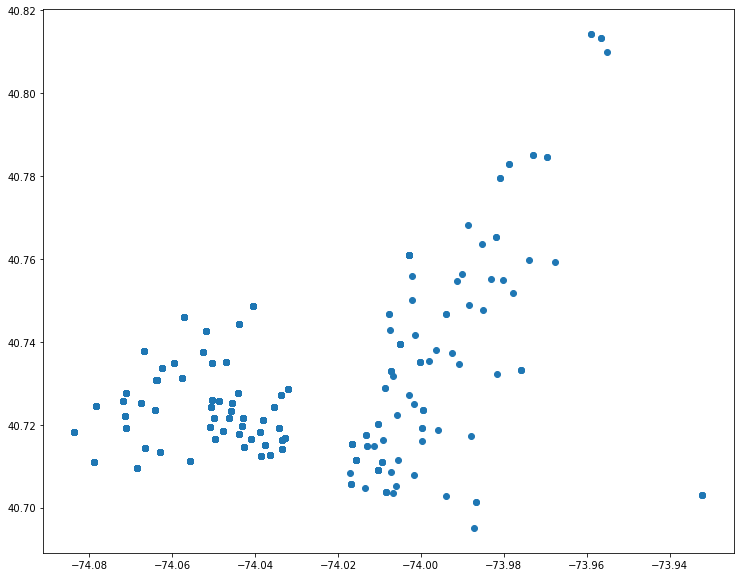

In [45]:
#plot the coordinates down on a graph
ny_19.plot(figsize= (20, 10))

In [46]:
#line up the coordinates with the crs of map of new york
ny_19.crs = {'init': 'epsg:4326'}
ny_19.to_crs(epsg=4326)

,trip_duration,start_time,stop_time,start_latitude,start_longitude,end_latitude,end_longitude,user_type,birth_year,gender,starting_coordinates,ending_coordinates,distance,start_hour,day,month
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,40.716247,-74.033459,40.712774,-74.036486,Subscriber,1993,1,POINT (-74.03346 40.71625),POINT (-74.03649 40.71277),0.484440,3,1,1
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,40.716247,-74.033459,40.724294,-74.035483,Subscriber,1972,2,POINT (-74.03346 40.71625),POINT (-74.03548 40.72429),0.915427,5,1,1
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,40.716247,-74.033459,40.711242,-74.055701,Subscriber,1985,1,POINT (-74.03346 40.71625),POINT (-74.05570 40.71124),2.222651,10,1,1
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,40.716247,-74.033459,40.724294,-74.035483,Customer,1969,0,POINT (-74.03346 40.71625),POINT (-74.03548 40.72429),0.915427,12,1,1
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,40.716247,-74.033459,40.724294,-74.035483,Customer,1969,0,POINT (-74.03346 40.71625),POINT (-74.03548 40.72429),0.915427,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19723,283,2019-12-31 23:12:18.548,2019-12-31 23:17:01.874,40.730897,-74.063913,40.722104,-74.071455,Customer,1990,1,POINT (-74.06391 40.73090),POINT (-74.07146 40.72210),1.219525,23,31,12
19724,267,2019-12-31 23:19:03.584,2019-12-31 23:23:30.664,40.719586,-74.043117,40.716540,-74.049638,Subscriber,1989,1,POINT (-74.04312 40.71959),POINT (-74.04964 40.71654),0.715918,23,31,12
19725,379,2019-12-31 23:19:06.583,2019-12-31 23:25:25.797,40.724176,-74.050656,40.717733,-74.043845,Subscriber,1984,1,POINT (-74.05066 40.72418),POINT (-74.04384 40.71773),0.973151,23,31,12
19726,188,2019-12-31 23:24:00.263,2019-12-31 23:27:09.040,40.719252,-74.034234,40.719586,-74.043117,Subscriber,1987,1,POINT (-74.03423 40.71925),POINT (-74.04312 40.71959),0.860220,23,31,12


## Bivariate Exploration

>It seems like the majority of this bike ride data is coming from jersey city, which would be the section that's not mapped.
The start and end coorindates are in the boroughs of the bronx and manhattan. While Queens, Staten Island and Brooklyn don't seem to have any rides coming from those areas. 

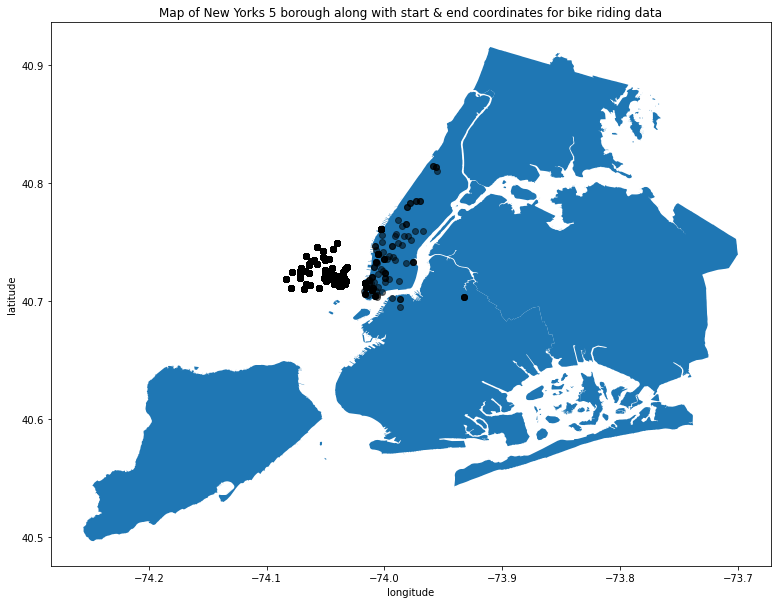

In [47]:
#plotting the starting and ending coordinate on a map of new york
fig, ax = plt.subplots(1, figsize = (20,10))
base= New_York.plot(ax=ax)
ny_19.plot(ax = base, alpha = .5, color = 'black')
plt.title('Map of New Yorks 5 borough along with start & end coordinates for bike riding data')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.savefig('map of new york for bike ride data');

> Most of the bike trips are happening between ages 80 and 15, with a weird spike in ages of 50

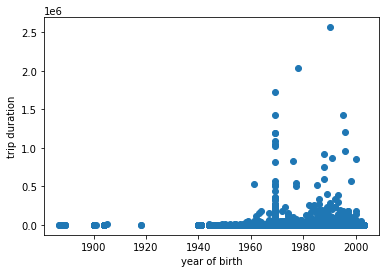

In [48]:
plt.scatter(data = ny_19, x = 'birth_year', y= 'trip_duration')
plt.xlabel('year of birth')
plt.ylabel('trip duration');


the vast majority seem to be in between 0 km & .1 km, and 20,000 seconds 

also their doesn't seem to be a correlation between distance traveled and trip duration. maybe trip duration need to be log transformed

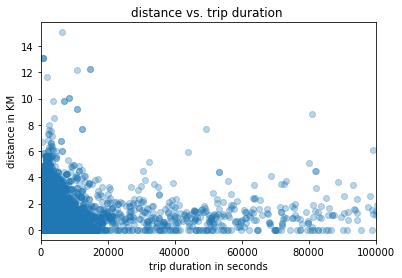

In [49]:
plt.scatter(data = ny_19, x = 'trip_duration', y = 'distance',alpha = .3)
plt.xlim(0,100000)
plt.ylabel('distance in KM')
plt.xlabel('trip duration in seconds')
plt.title('distance vs. trip duration ');

> The customers seem like they are speending much more time on the bike on average per trip.

Text(0.5, 1.0, 'user types and the time spent on bike')

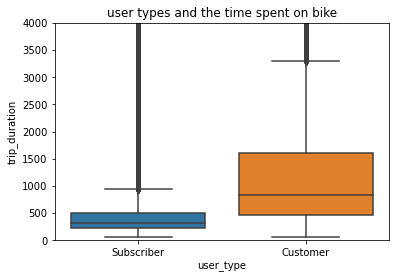

In [50]:
sb.boxplot(data = ny_19 , x = 'user_type', y = 'trip_duration' )
plt.ylim(0, 4000)
plt.title('user types and the time spent on bike')

>this is interesting it seemed people who aren't subscribed to the service on average have longer commutes that than do the subscribers, the trip seems to last longer for customer, but the distance they seem to be going is similar.

(0.0, 15.799680861471744)

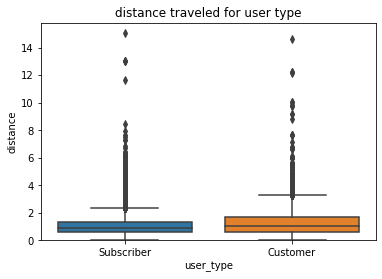

In [51]:
sb.boxplot(data = ny_19, x = 'user_type', y = 'distance')
plt.title('distance traveled for user type')
plt.ylim(0,)

>Could the number of age entrys could be corelated wether on not they identirfy as male or female. also the age demographic seem to be to be ranging from 15-60, but 50% of the age demographic are between the age of 30 - 40. 

(1950.0, 2020.0)

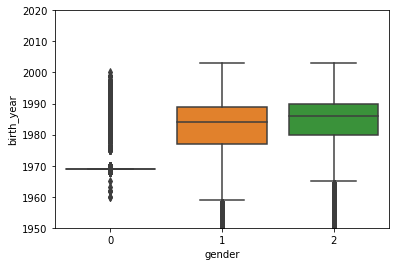

In [52]:
sb.boxplot(data = ny_19 , x = 'gender', y = 'birth_year')
plt.ylim(1950, 2020)


> The distance the everyone seems to be traveling doesn't really seem to be changing 

(0.0, 8.0)

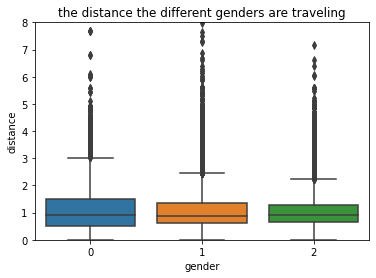

In [53]:
sb.boxplot(data = ny_19, x = 'gender', y = 'distance')
plt.title('the distance the different genders are traveling');
plt.ylim(0,8)

> On average it seems that the riders are riding both longer and shorter during the waking hours of the day

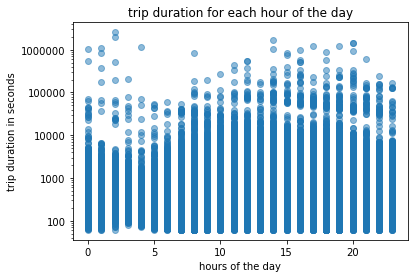

In [54]:
yticks_locs = [100, 1000, 10000, 100000, 1000000]
plt.scatter(data = ny_19 , x = "start_hour", y = "trip_duration", alpha = .5)
plt.yscale('log')
plt.yticks(yticks_locs,yticks_locs)
plt.ylabel('trip duration in seconds')
plt.xlabel('hours of the day')
plt.title('trip duration for each hour of the day');

>This seems a lot more condesed than the log transformation 


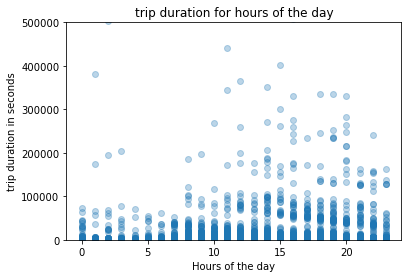

In [55]:
plt.scatter(data = ny_19, x = 'start_hour', y = 'trip_duration', alpha = .3)
plt.ylim(0,500000)
plt.xlabel('Hours of the day')
plt.ylabel('trip duration in seconds')
plt.title('trip duration for hours of the day');

>It would appear from the graph above that riders are much more likely to go on a longer ride at the beggining and end of the summer when it would be the nicest out.

Text(0.5, 0, 'Month of the year')

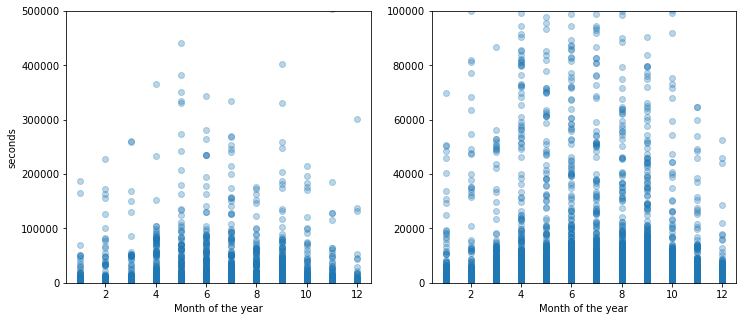

In [56]:
plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
plt.scatter(data = ny_19, x = 'month', y = 'trip_duration', alpha = .3)
plt.ylim(0, 500000)
plt.ylabel('seconds')
plt.xlabel('Month of the year')

plt.subplot(1,2,2)
plt.scatter(data = ny_19, x= 'month', y= 'trip_duration', alpha = .3)
plt.ylim(0, 100000)
plt.xlabel('Month of the year')

>Not a lot of females are subscribers, the question from should you double down on marketing to men since they seem to be the ones who really use the service or should you target women since they are not using the services as much. 
Why aren't their that many female subscribers.

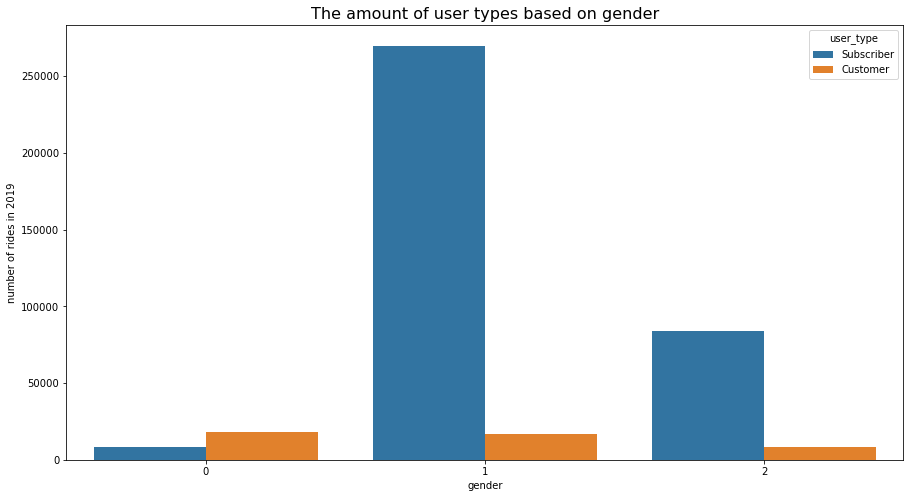

In [57]:
plt.figure(figsize = (15,8))
sb.countplot(data = ny_19, x= 'gender', hue = 'user_type')
plt.title('The amount of user types based on gender' , fontsize = 16)
plt.ylabel('number of rides in 2019')
plt.savefig('Gender chart')

>I think the customer type would much more likely be tourist visiting new york, because have the count stays much more consitent through out the work day, unlike the subscriber were it seem's to peak at the start and at the end of the work day.

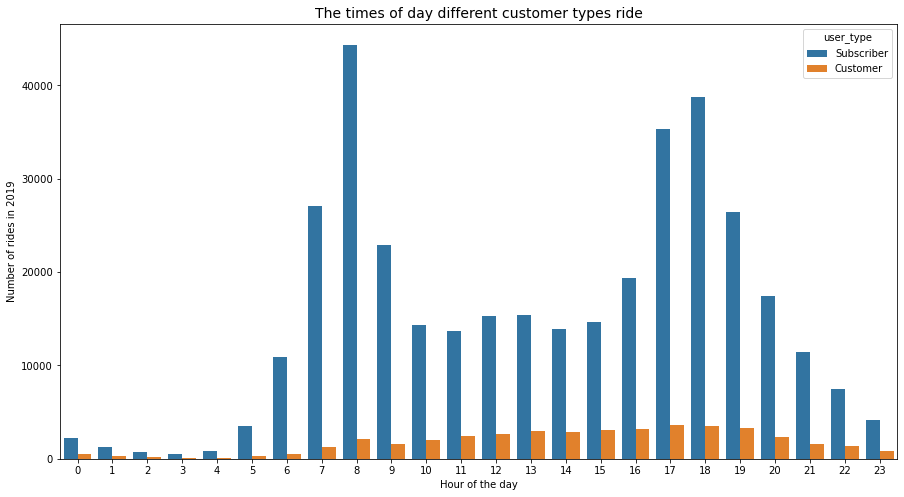

In [58]:
plt.figure(figsize= (15,8))
sb.countplot(data = ny_19, x = 'start_hour', hue  = 'user_type')
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides in 2019')
plt.title('The times of day different customer types ride', fontsize = 14)
plt.savefig('hours of the chart')

## Multivariate Exploration

>Specifaly for the unkown gender right at 1970 tick theirs a lot riders compared to the rest of the plot. You don't see that same trend for riders in the 50s for the male or female, so it could possible be a default setting

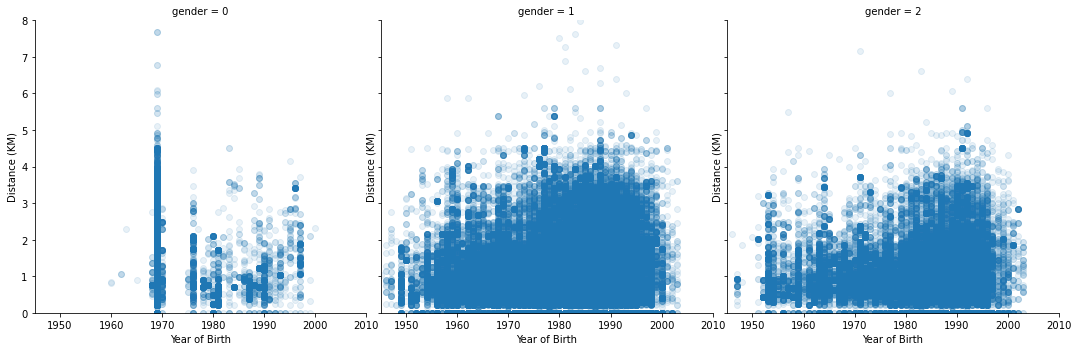

In [59]:
g = sb.FacetGrid(data = ny_19, col = 'gender', height = 5)
g.map(plt.scatter, 'birth_year', 'distance', alpha = .1)
g.add_legend()
plt.xlim(1945, 2010)
plt.ylim(0,8)
g.set( ylabel = 'Distance (KM)', xlabel = 'Year of Birth')
plt.savefig('another graph')

> It seems that their are more youger women who ride than older if you observe the chart on the far right, which also seem true for the male plot which is in the middle

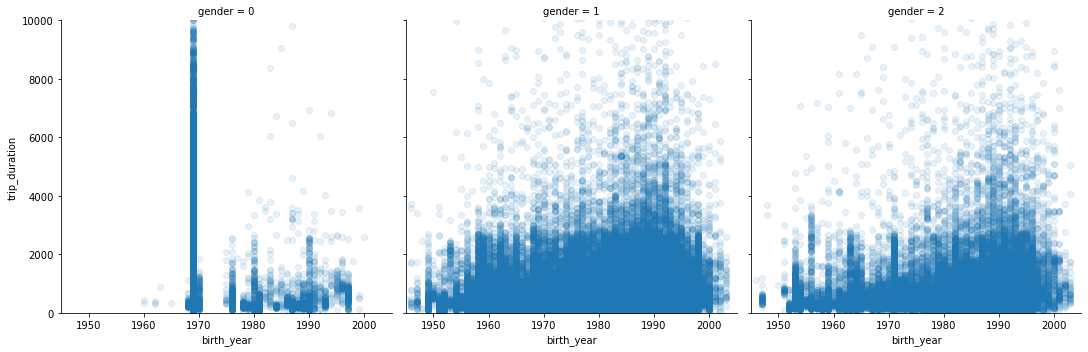

In [60]:
g = sb.FacetGrid(data = ny_19, col = 'gender', height = 5)
g.map(plt.scatter, 'birth_year', 'trip_duration', alpha = .1)
plt.xlim(1945, 2005)
plt.ylim(0,10000)
g.set()

> it almost seems with log transformation with trip duration that the relationship could be a linear. This shows that one time users are more likely to have longer trip but still go about same distance as the subscribers. This also shows that further distance that you travel the longer your trip will be. Although distance doesn't seem to be what cause some trips to be longer than others


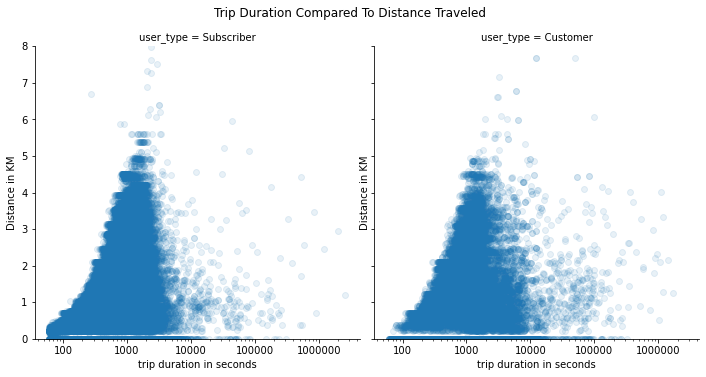

In [61]:
tick_locs = [100, 1000, 10000, 100000, 1000000]
g = sb.FacetGrid(data = ny_19, col = 'user_type', height = 5)
g.map(plt.scatter, 'trip_duration', 'distance' , alpha = .1)
g.set(xscale = 'log')
g.set(xticks = tick_locs, xticklabels = tick_locs)
g.set(xlabel = 'trip duration in seconds', ylabel = 'Distance in KM')
g.set(ylim = (0, 8))
g.fig.suptitle('Trip duration compared to distance traveled'.title(),  y= 1.04)
plt.savefig('trip durations VS distance');

> For the distance it doesn't really seem to matter what the gender is or if the gender is know, although the male gender subscriber seems like it has the most outliers. The really difference in distance traveled seems to be user type, where it seems a one time user on average travels further. 

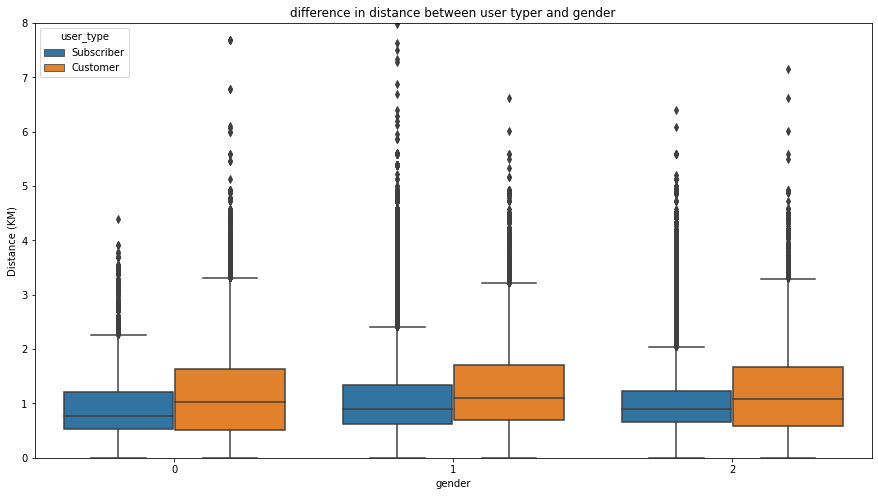

In [62]:
plt.figure(figsize = [15, 8])
sb.boxplot(data = ny_19, x = 'gender', y = 'distance', hue = 'user_type')
plt.ylim(0,8)
plt.title('difference in distance between user typer and gender')
plt.ylabel('Distance (KM)')
plt.savefig('gender and usertype')

In [ ]:
!jupyter nbconvert Slide_show.ipynb --to slides --post serve --template output_toggle